<a href="https://colab.research.google.com/github/Sorin9202/SOLUX_summer_data/blob/master/3%EC%A3%BC%EC%B0%A8/Kaggle-ML-DS-survey-2017-EDA-FAQ(%EC%BA%90%EA%B8%80%EB%9F%AC%EB%A5%BC%20%EB%8C%80%EC%83%81%EC%9C%BC%EB%A1%9C%20%ED%95%9C%20%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC)(1-2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **캐글러를 대상으로 데이터과학과 머신러닝에 대한 설문조사의 응답을 파이썬 데이터 시각화 툴로 분석해 봅니다.**

## **데이터 파일**

5 개의 데이터 파일을 제공
- schema.csv 
- multipleChoiceResponses.csv
- freeformResponses.csv
- converstionRates.csv
- RespondentTypeREADME.txt

In [ ]:
#노트북 안에서 그래프를 그리기 위해서
%matplotlib inline

#Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats #사이파이(scipy)는 수치해석기능을 위한 파이썬 라이브러리. 그 중 stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공. (출처: 데이터사이언스스쿨)
import matplotlib.pyplot as plt 
import seaborn as sns #seaborn은 데이터 시각화 튜토리얼

#Suppress Deprecat and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore') #경고가 보이지 않도록 ignore 처리

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
question = pd.read_csv('Data Source/schema.csv') #질문 데이터가 있는 schema.csv
question.shape #몇 행 몇 열인지.

(290, 3)

In [ ]:
question.head() #상위 5개의 데이터만 찍힘. tail은 하위 5개의 데이터

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [ ]:
#판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
#포맷이 맞지 않아 인코딩
mcq = pd.read_csv('Data Source/multipleChoiceResponses.csv', encoding = "ISO-8859-1", low_memory = False)
mcq.shape

(16716, 228)

In [ ]:
#16716명이 응답, 선다형 객관식 문제는 228개의 column
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

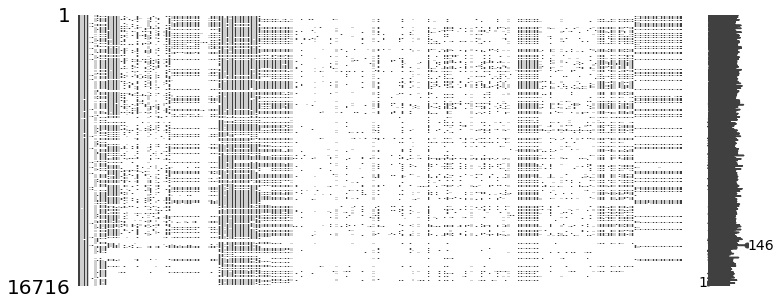

In [ ]:
#missingnos는 NaN 데이터에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 힘들다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5)) 

- 16,716 명의 데이터가 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

## **설문통계**

### **성별**

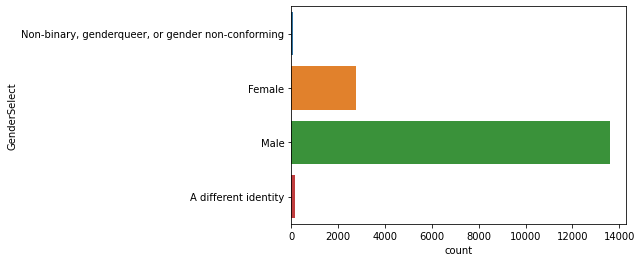

In [ ]:
#성별
sns.countplot(y = 'GenderSelect', data = mcq) 
#countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시 가능하다.
#data에는 대상이 되는 데이터프레임을, y에는 데이터프레임의 행 이름 문자열을 넣는다. (열은 x)

여성보다는 남성의 비율이 높은 것을 볼 수 있다.

### **국가별 응답 수**

In [ ]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
print(con_df)
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다.
con_df = con_df.reset_index().drop('index',axis = 1)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Singapore                        184
Poland                           184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [ ]:
# 우리나라는 18위고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


### **연령**

In [ ]:
# 연령에 대한 정보를 본다.
# describe를 하면 'Age'란 칼럼에 몇 개의 응답이 있는지 알 수 있다.
# 표준편차와 최댓값 등을 확인할 수 있다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

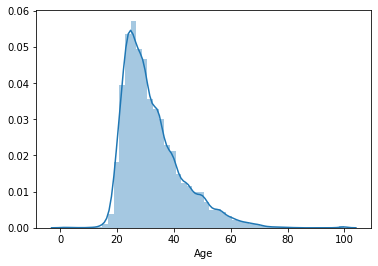

In [ ]:
# 나이에 대한 데이터 시각화
# distplot은 1차원 실수 분포 플롯 명령. distplot에는 러그와 커널 밀도 표시 기능이 있다.
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

- 러그(rug) 플롯: 데이터 위치를 x 축 위의 작은 선분(rug)로 나타내어 실제 데이터의 위치를 보여준다.
- 커널 밀도(kernel density): 커널이라는 함수를 겹치는 방식으로 히스토그램보다 훨씬 부드러운 형태의 분포 곡선을 보여준다.
(출처: 데이터사이언스스쿨)

응답자의 대부분이 어리며, 20대부터 급격히 늘어난다. 30대가 가장 많다. 
평균 나이는 32세.

### **학력**

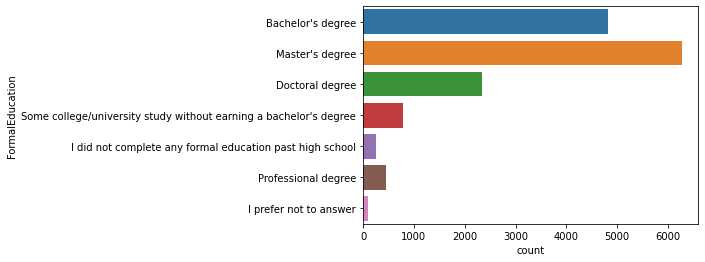

In [ ]:
#학력
sns.countplot(y = 'FormalEducation', data = mcq)

석사 학위를 가지고 있는 사람이 학사 학위를 가지고 있는 사람보다 많으며, 박사 학위를 가지고 있는 사람도 많다.

### **전공**

In [ ]:
# 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize = True 옵션을 사용하면,
# 해당 데이터가 전체 데이터에서 어느 정도의 비유를 차지하는 지 보여준다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))

- normalize = False : 개수
- normalize = True : 상대 비율

In [ ]:
# 하나의 테이블에 모아서 보고 싶기 때문에 merge를 해준다.
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

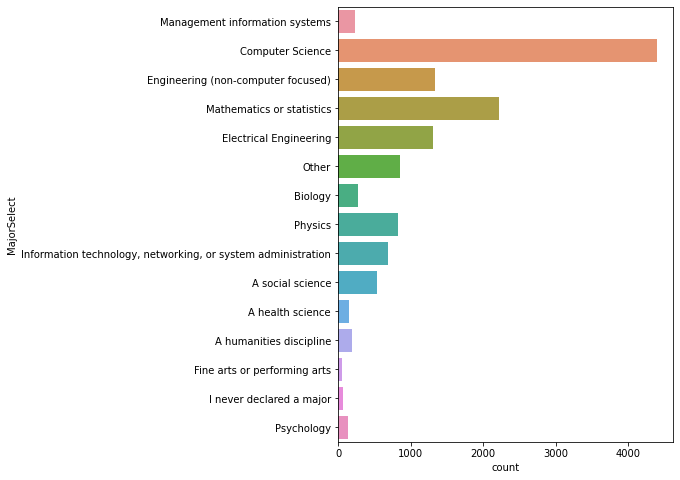

In [ ]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize=(6,8)) #figure의 크기 조정. 최초 창의 크기를 세로 6인치 가로 8인치
sns.countplot(y = 'MajorSelect', data = mcq)

### **취업 여부**

In [ ]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


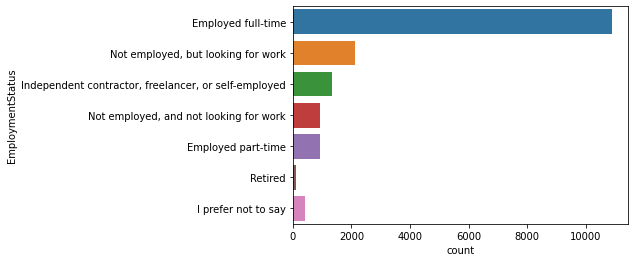

In [ ]:
sns.countplot(y = 'EmploymentStatus', data = mcq)

응답자의 대부분인 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%로 두 번째로 많다.

### **프로그래밍 경험**

- 'Tenure' 항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

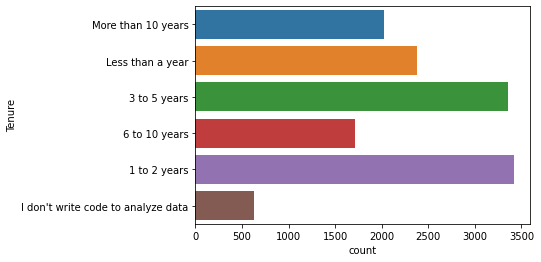

In [ ]:
sns.countplot(y = 'Tenure', data = mcq)

The number of interviewees in Korea: 194


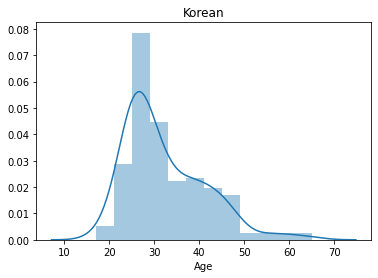

In [ ]:
# 대한민국 응답자 수
# loc - 행을 인덱싱하는 함수. Series 형태로 가져온다.
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna()) #dropna로 결측값있는 행 제거(NaN 데이터 제거)
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

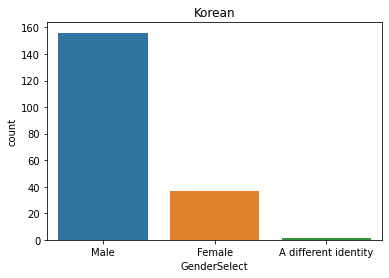

In [ ]:
sns.countplot(x = 'GenderSelect', data = korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

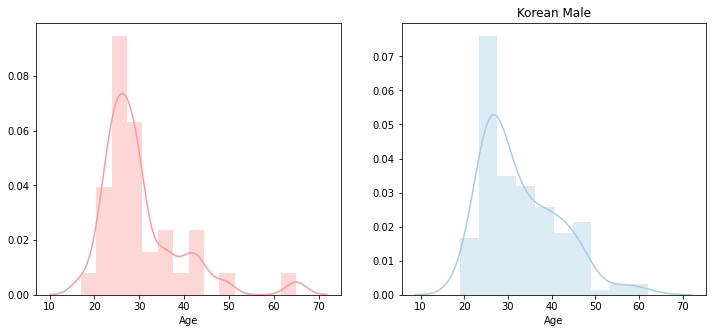

In [ ]:
#성별을 연령대로
#subplots은 한 번에 여러 그래프를 볼 때 사용하는 함수
#figure는 전체 서브플롯, ax는 axe로 낱개의 그래프를 뜻한다. male, female이 들어가므로 2개의 ax 필요
figure, (ax1, ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), norm_hist = False, color = sns.color_palette("Paired")[4],ax = ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(), norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
plt.title('Korean Male')

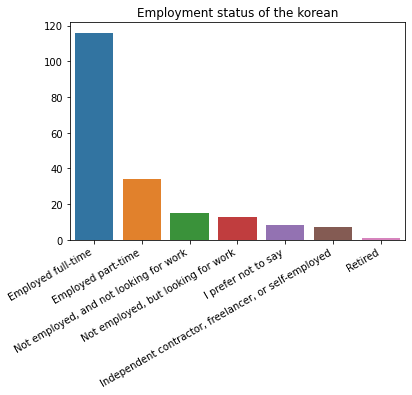

In [ ]:
sns.barplot(x = korea['EmploymentStatus'].unique(), y = korea['EmploymentStatus'].value_counts())
#plt.xticks는 x축의 눈금 위치 및 레이블 속성을 가져오거나 설정. x축 레이블 텍스트 편집(시대 반대 방향으로 30도 회전, 레이블 텍스트의 오른쪽 끝을 눈금에 맞춤)
plt.xticks(rotation = 30, ha = 'right')  
plt.title('Employment status of the korean')
plt.ylabel('') #y축 라벨은 비워둔다.
plt.show()

- unique() : 중복된 데이터 삭제

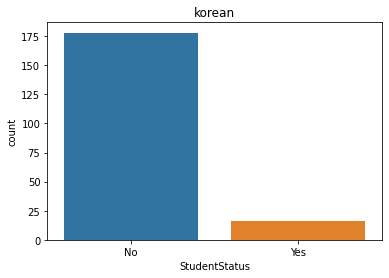

In [ ]:
#학생인지 아닌지에 대한 데이터
#fillna - let the user replace NaN value with some value of their own 
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')  
sns.countplot(x = 'StudentStatus',data = korea)
plt.title('korean')
plt.show()

In [ ]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## **자주 묻는 질문 FAQ**

- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화해본다.

### **Q1. Python과 R중 어떤 언어를 배워야 하나요?**

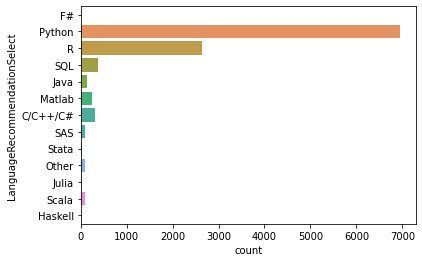

In [ ]:
sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)

응답자의 대부분이 파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문가들과 강사들이 선호하는 언어를 알아본다.

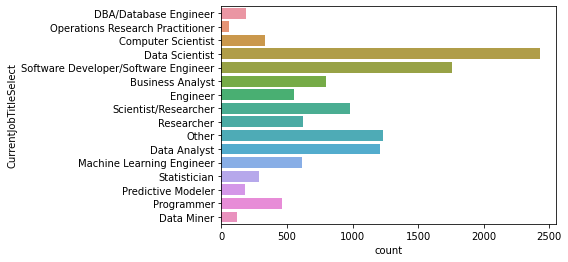

In [ ]:
# 현재 하고 있는 일
sns.countplot(y = mcq['CurrentJobTitleSelect'])

In [ ]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

In [ ]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)

(7158, 228)


전체 11,830명 중 파이썬과 R을 사용하는 사람들은 7,158 명

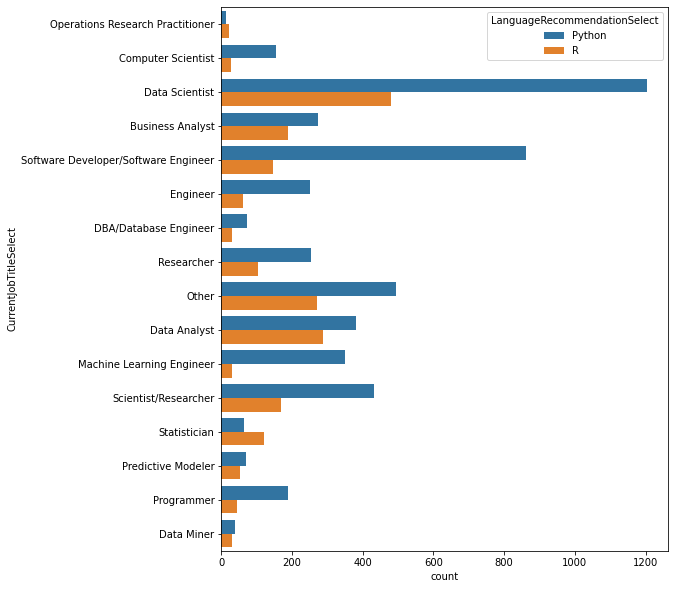

In [ ]:
plt.figure(figsize = (8, 10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect', data = data)

카테고리형 인수가 섞여 있을 경우 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색깔을 다르게 지정할 수 있다.

데이터 사이언티스트는 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 소프트웨어 개발자의 경우 Python의 사용 비율이 R에 비해 훨씬 높은 것으로 나타났으며, 유일하게 통계학자와 리서처들에게서만 R의 사용 비율이 Python보다 높게 나타났다.

### **Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 분야는 무엇일까요?**

#### **데이터사이언스 툴**




In [ ]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize = True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, 
    left_index = True, 
    right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


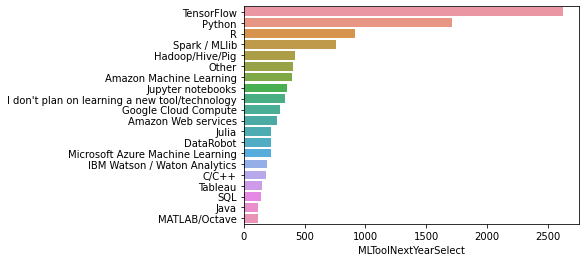

In [ ]:
# 응답을 그래프로
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y = data.index, x = data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 높았으며, 그 뒤를 Python이 15%, R은 8%로 따르고 있다.

클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

#### **데이터사이언스 방법**

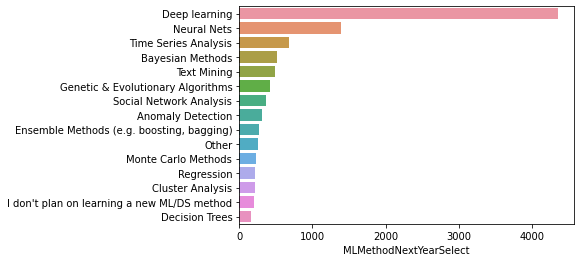

In [ ]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

딥러닝이 가장 높게 나타났으며 그 뒤를 뉴럴넷이 따른다. 이 외에도 시계열 분석, 베이지안, 텍스트 마이닝 등을 볼 수 있다. 중간쯤에 부스팅과 배깅 같은 앙상블 메소드도 눈에 띈다.

### **Q3. 어디에서 데이터 사이언스를 배워야 할까요?**

In [ ]:
#astype 이용해 str 데이터로 전환
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop = True)
s.name = 'platform'

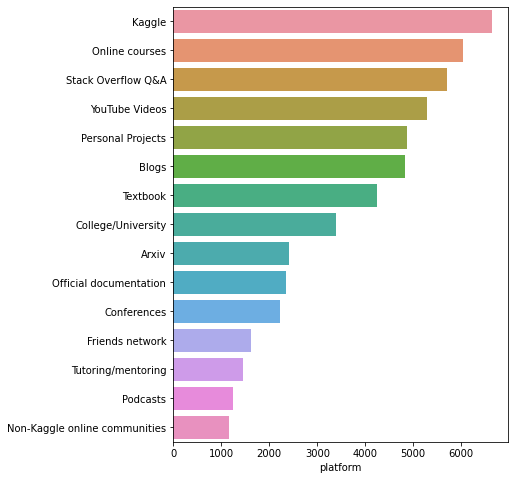

In [ ]:
plt.figure(figsize = (6,8))
data = s[s != 'nan'].value_counts().head(15) #NaN 데이터 제거
sns.barplot(y = data.index, x= data)

- Kaggle이 응답자들 사이에서 가장 인기있는 학습 플랫폼으로 나타났다.
- 그러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음을 유의해야 한다.
- 온라인 코스, 스택 오버플로 및 유튜브 (YouTube) 상위 5 대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높게 나타났다.

In [ ]:
# 설문 내용과 누구에게 물어봤는지
#Learning Category 안의 질문
qc = question.loc[question['Column'].str.contains('LearningCategory')] 
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [ ]:
# 질문 항목들을 use_features 에 모은다.
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

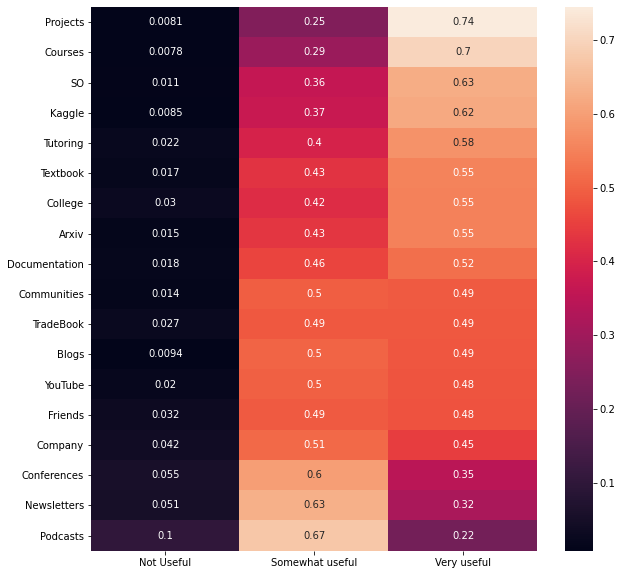

In [ ]:
# 학습플랫폼과 유용함에 대한 연관성 살펴본다.
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

# 내림차순 정렬
fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending = False 
)

# 학습 플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize = (10,10))
sns.heatmap(
    fdf.sort_values("Very useful", ascending = False), annot = True)

프로젝트를 해보는 것이 가장 유용하다고 나타났으며, 그 뒤로 강좌와 스택 오버플로우, 캐글이 뒤따른다.

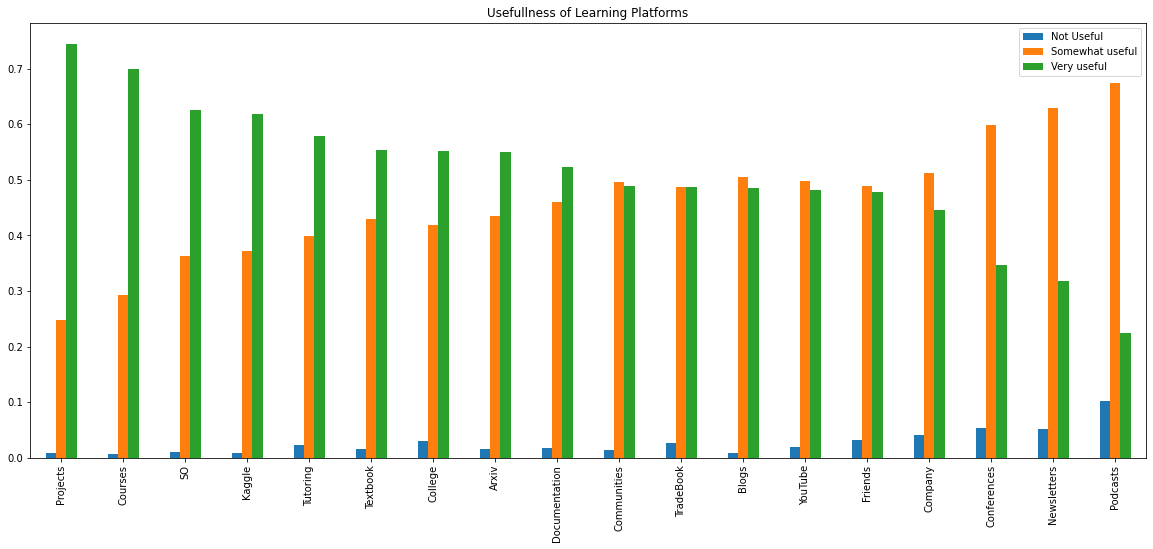

In [ ]:
# 유용함의 정보를 각 플랫폼 별로 그룹화해서 본다.
fdf.plot(kind = 'bar', figsize = (20,8),
         title = "Usefullness of Learning Platforms")

파이 차트로 그려보기로 함.

In [ ]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [ ]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이 차트를 그리기 위해 평균 값을 구해 와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

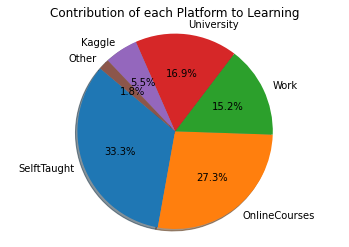

In [ ]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
# seaborn에서 pie 차트 지원하지 않아 matplotlib로 그림
plt.pie(cdf, labels = cdf.index, 
        autopct='%1.1f%%', shadow = True, startangle=140) #autopct : 파이 조각 전체 대비 백분율
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인 프로젝트를 해보는 것이 도움이 되었다는 응답이 가장 높았으며, 그 뒤로 온라인코스와 대학, 업무, 캐글 순으로 응답하였다.


### **Q4. 데이터과학을 위해서는 고사양의 컴퓨터가 필요한가요?**

In [ ]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


현재 학습하고 있는 사람들을 대상으로 물어봄.

In [ ]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [ ]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level = 1, drop = True)
s.name = 'hardware'

s = s[ s!= 'nan']

pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
GCE ...),669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북과 같은 노트북을 사용한다는 응답이 가장 높게 나타났으며, 랩탑과 클라우드를 함께 사용한다는 응답이 뒤따랐다.

### **Q6. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하나요?**

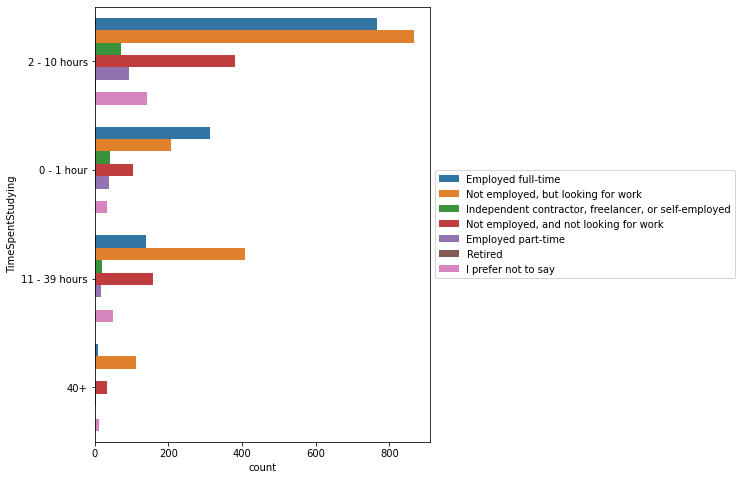

In [ ]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data = mcq, 
              hue = 'EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor = (1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

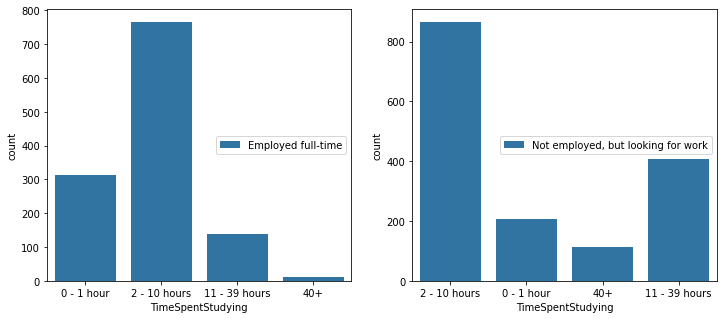

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x = 'TimeSpentStudying', 
              data = full_time,
              hue ='EmploymentStatus', ax=ax1
             ).legend(loc = 'center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x = 'TimeSpentStudying', 
              data = looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc = 'center right',
                      bbox_to_anchor=(1, 0.5))